<a href="https://colab.research.google.com/github/Abhisikta11/Emotion_Detection2/blob/main/Emotion_Detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Kaggle dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/2Emotion_Detection"

In [ ]:
%cd /content/drive/MyDrive/2Emotion_Detection

/content/drive/MyDrive/2Emotion_Detection


In [ ]:
!kaggle datasets download -d abhisiktanayak/sleep-detection

403 - Forbidden - Permission 'datasets.get' was denied


In [ ]:
!ls

kaggle.json  sleep-detection.zip  Sleep_Detector  yolov5


**Unzipping the dataset**

In [ ]:
!unzip \*.zip && rm *.zip

Archive:  sleep-detection.zip
replace Sleep_Detector/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow as tf
print("Tensorflow version", tf.__version__)


Tensorflow version 2.15.0


**Preparing the Data**

In [ ]:
train_dir = '/content/drive/MyDrive/2Emotion_Detection/Sleep_Detector/train'
val_dir = '/content/drive/MyDrive/2Emotion_Detection/Sleep_Detector/valid'
test_dir = '/content/drive/MyDrive/2Emotion_Detection/Sleep_Detector/test'

print("Data directories are set.")

Data directories are set.


**Exploring the Dataset**

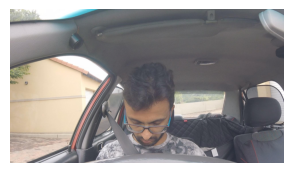

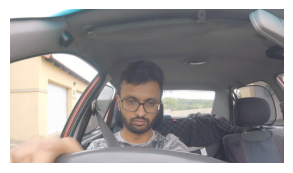

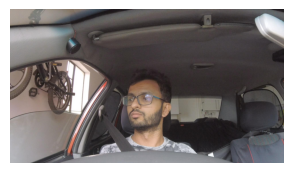

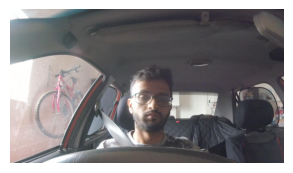

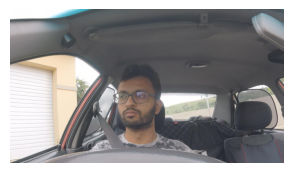

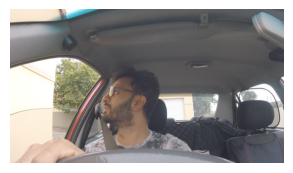

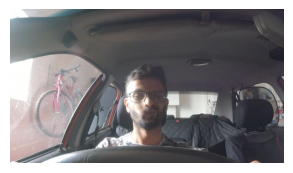

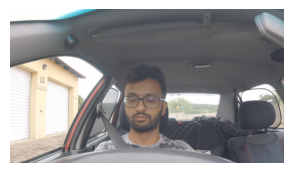

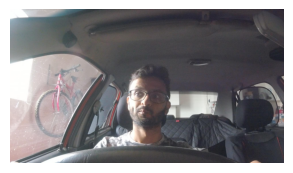

In [ ]:
train_img = os.path.join(train_dir, '**', '*.jpg')
images = glob(train_img)
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

**Preparing Data for Training**

In [ ]:
img_size = 48
batch_size = 6
seed_value = 42

import random
import tensorflow as tf
random.seed(seed_value)
tf.random.set_seed(seed_value)

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Activation
!pip install --upgrade keras
np.random.seed(seed_value)


datagen_train = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen_validation = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory("/content/drive/MyDrive/2Emotion_Detection/Sleep_Detector/train",
                                                   target_size=(img_size, img_size),
                                                   color_mode="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)

validation_generator = datagen_validation.flow_from_directory("/content/drive/MyDrive/2Emotion_Detection/Sleep_Detector/valid",
                                                   target_size=(img_size, img_size),
                                                   color_mode="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)

datagen_test = ImageDataGenerator(rescale=1./255)
test_generator = datagen_test.flow_from_directory("/content/drive/MyDrive/2Emotion_Detection/Sleep_Detector/test",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False)

Found 352 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


**Defining Model**

In [ ]:
!pip install keras-nightly
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

num_classes = 2
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')])

def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)
    return x

def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

def model_sleep_detector(input_shape, num_classes):
    from tensorflow.keras.layers import Input
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 64, (3,3))
    conv_2 = Convolution(conv_1, 128, (5,5))
    conv_3 = Convolution(conv_2, 256, (3,3))
    conv_4 = Convolution(conv_3, 512, (3,3))

    flatten = Flatten()(conv_4)

    dense_1 = Dense_f(flatten, 256)
    dense_2 = Dense_f(dense_1, 512)

    output = Dense(num_classes, activation="softmax")(dense_2)
    model = Model(inputs=[inputs], outputs=[output])

    opt = Adam(learning_rate=0.0005)

    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

input_shape = (48, 48, 1)
model = model_sleep_detector(input_shape, num_classes)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,000,322 (11.45 MB)

 Trainable params: 2,996,866 (11.43 MB)

 Non-trainable params: 3,456 (13.50 KB)

**Training the model**

In [ ]:
epochs = 30
from tensorflow.keras.preprocessing.image import ImageDataGenerator
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
checkpoint = ModelCheckpoint("model.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
callbacks = [checkpoint, reduce_lr, early_stop]

print("Number of samples in train_generator:", train_generator.n)

Number of samples in train_generator: 352


In [ ]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.7969 - loss: 0.4080
Epoch 1: saving model to model.weights.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 60s 938ms/step - accuracy: 0.7993 - loss: 0.4039 - val_accuracy: 1.0000 - val_loss: 0.2463 - learning_rate: 5.0000e-04
Epoch 2/30
 1/58 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - accuracy: 1.0000 - loss: 0.0112

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to model.weights.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 1.0000 - val_loss: 0.2401 - learning_rate: 5.0000e-04
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 1.0000 - loss: 0.0098
Epoch 3: saving model to model.weights.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 399ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 0.0673 - learning_rate: 5.0000e-04
Epoch 4/30
 1/58 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 1.0000 - loss: 0.0056
Epoch 4: saving model to model.weights.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0660 - learning_rate: 5.0000e-04
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 1.0000 - loss: 0.0044
Epoch 5: saving model to model.weights.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 395ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0205 - learning_rate: 5.

**Evaluating the Model**

In [ ]:
model.evaluate(validation_generator)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 1.0000 - loss: 0.0013


[0.0013445251388475299, 1.0]

**Plotting the Model**

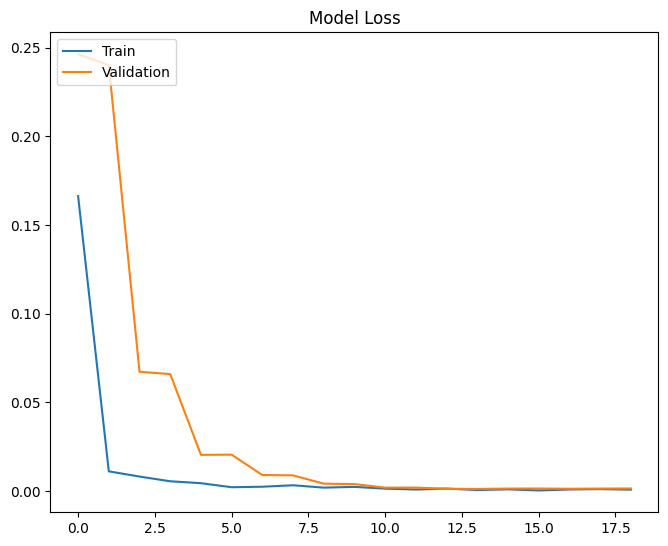

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show()

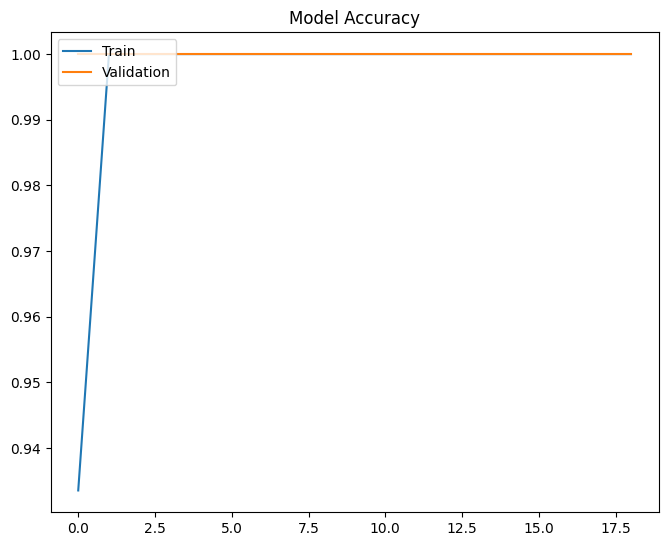

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show()

In [ ]:
test_generator = datagen_validation.flow_from_directory("/content/drive/MyDrive/2Emotion_Detection/Sleep_Detector/test"
    ,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

Found 71 images belonging to 2 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 1.0000 - loss: 0.0014
Test Accuracy: 1.0
Test Loss: 0.001345392782241106


**Saving the model**

In [ ]:
model_json = model.to_json()
with open("model_sleep.json", "w") as json_file:
    json_file.write(model_json)

**Loading the Model**

In [ ]:
import os
import tkinter as tk
from tkinter import filedialog, Label, Button
from tkinter import *
from tensorflow.keras.models import model_from_json
from PIL import Image, ImageTk
import numpy as np
import cv2

def SleepDetectionModel(json_file, weights_file):
    with open(json_file, "r") as file:
        loaded_model_json = file.read()
        model = model_from_json(loaded_model_json)
        model.load_weights(weights_file)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

!apt-get install -y xvfb
!pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(800, 600))
display.start()

json_file = "model_sleep.json"
weights_file = "model.weights.h5"
model = SleepDetectionModel(json_file, weights_file)

top = tk.Tk()
top.geometry('800x600')
top.title('Sleeping Detection in Car')
top.configure(background='#CDCDCD')

label1 = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)

facec = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def Detect(file_path):
    global label_packed
    image = cv2.imread(file_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = facec.detectMultiScale(gray_image, 1.3, 5)
    results = []
    for (x, y, w, h) in faces:
        fc = gray_image[y:y+h, x:x+w]
        roi = cv2.resize(fc, (48, 48))
        roi = roi.astype('float') / 255.0
        roi = np.expand_dims(roi, axis=0)
        roi = np.expand_dims(roi, axis=-1)
        pred = model.predict(roi)
        if pred[0][1] > 0.5:  # Assuming index 1 is 'Sleeping'
            results.append(f"Sleeping")
    label1.configure(foreground="#011638", text=f"Detected: {len(results)} sleeping persons")

def show_Detect_button(file_path):
    detect_b = Button(top, text="Detect Sleeping", command=lambda: Detect(file_path), padx=10, pady=5)
    detect_b.configure(background="#364156", foreground='white', font=('arial', 10, 'bold'))
    detect_b.place(relx=0.79, rely=0.46)
    pass

def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.3), (top.winfo_height()/2.3)))
        im = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image = im
        label1.configure(text='')
        show_Detect_button(file_path)
    except:
        pass

upload = Button(top, text="Upload Image", command=upload_image, padx=10, pady=5)
upload.configure(background="#364156", foreground='white', font=('arial', 10, 'bold'))
upload.pack(side='bottom', pady=50)
sign_image.pack(side='bottom', expand='True')
label1.pack(side='bottom', expand='True')
heading = Label(top, text="Detect Sleeping in Car", pady=20, font=('arial', 20, 'bold'))
heading.configure(background="#CDCDCD", foreground='#364156')
heading.pack()
top.mainloop()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 7,813 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv